## Data Analyst - Problem Set

### Overview
The problem set consists of a series of 6 questions of gradually increasing difficulty. Complete as much as you can and don't worry if a problem stumps you. Each question will test your ability to program in python as well as your ability to interpret and analyze the resulting output. 

### Data
The dataset is for a game between the Penguins and Capitals from the 2018-19 season. The data we'll be using is an extract of Sportlogiq's proprietary spatio-temporal event dataset.  Please do not publish or share this data in any way.

### Setup
Make sure you have the following libraries installed in your python environment. Make sure to do all your data manipulation in python and show your work. Feel free to do exploratory analysis using the Jupyter Notebook environment but try to clean up your final code. Your notebook should run from start to finish and only import the following 4 libraries.

### Output
Once you've finished, just save and send back the jupyter notebook file (no need to include the CSV data files). This file should be named `AnalystProblemSet_FirstName-LastName.ipynb`. 

In [2]:
#import libraries and set up options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data from csv

data_files = r'C:\Users\Home\Downloads'

events = pd.read_csv(r'C:\Users\Home\Downloads\sliq_analyst_problem_set (1)\gameevents.csv')
rosters = pd.read_csv(r'C:\Users\Home\Downloads\sliq_analyst_problem_set (1)\gamerosters.csv')
teams = pd.read_csv(r'C:\Users\Home\Downloads\sliq_analyst_problem_set (1)\teams.csv')

### Q1. Merge Team and Roster Data
Join the `rosters` and `teams` dataframes. Excluding goalies, and grouping by `teamShorthand`, `primaryPosition` and `handedness`, plot a horizontal bar chart showing handedness by player position and team. 

#### Analysis 
Which team has a equal numbers of left and right handed defenders? 

Answer: Team Capitals (WSH) have equal number of Left and Right handed Defenders


Which team seems more inbalanced in terms of handedness and towards which side?

Answer: Team Penguins (PIT) seem more imbalanced favouring left handed players. The ratio of the number of right handed players to left handed players is 1:2



   

handedness                      L  R
teamShorthand Primary Position      
PIT           D                 4  2
              F                 8  4
WSH           D                 3  3
              F                 7  5

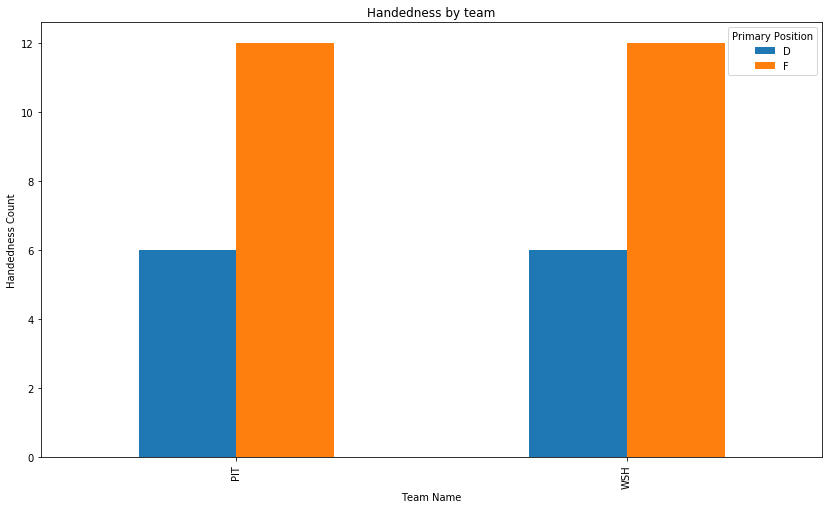

In [4]:
### Q1. Merge Team and Roster Data
###Join the `rosters` and `teams` dataframes. Excluding goalies, and grouping by `teamShorthand`, `primaryPosition` and `handedness`, plot a horizontal bar chart showing handedness by player position and team. 

Merged = pd.merge(rosters, teams, left_on=['teamId'], right_on = ['teamId'])
#Exclude Goalies
Merged1=Merged[Merged.primaryPosition != 'G']
#Subsetting the data into another Dataframe
Grouped=Merged1[['teamShorthand', 'primaryPosition', 'handedness']].rename(columns={'primaryPosition':'Primary Position'})

#Plotting a Bar Graph for Team Short Hand, Primary Position & Handedness
ax = Grouped.groupby(['teamShorthand', 'Primary Position'])['handedness'].count().unstack(fill_value=0).plot.bar(title="Handedness by team", figsize=(14,8))
_ = ax.set_xlabel('Team Name')
_ = ax.set_ylabel('Handedness Count')


#Grouping Handedness by Position and team name
Grouped.groupby(['teamShorthand', 'Primary Position', 'handedness']).size().unstack(fill_value=0)





### Q2. Calculate the Number of Shot Attempts
Join the `events` and `teams` dataframes. Grouping by `teamShorthand`, `outcome`, plot a stacked bar chart showing shot attempt counts (including both successful and failed shots) grouped by team. 

#### Analysis 
Which team dominated the shot attempts and what was the Corsi ratio? 

Answer: Team Penguins (PIT) dominated the shot attempts and the Corsi (for %) of the dominant team (PIT) was 57.75%. Corsi Number was +18 (Calculated at Even Strength)


Which `outcome` did the dominant team generate their lead in? 

Answer: The dominant team, Team Penguins had more failed & successful shot attempts than Team Capitals.

teamShorthand
PIT                                                           67
WSH                                                           49
Corsi Ratio    teamShorthand
PIT    57.758621
WSH    42.24137...
Name: outcome, dtype: object


outcome        failed  successful
teamShorthand                    
PIT                32          35
WSH                20          29

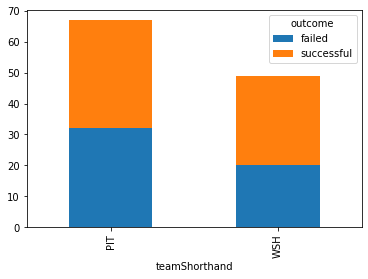

In [5]:
###Join the `events` and `teams` dataframes. Grouping by `teamShorthand`, `outcome`, plot a stacked bar chart showing shot attempt counts (including both successful and failed shots) grouped by team. 

Ev_teams = pd.merge(events, teams, left_on=['teamId'], right_on = ['teamId'])

#Subsetting data to only consider shots
Ev_team_shot=Ev_teams[(Ev_teams.name == 'shot')& (Ev_teams.manpowerSituation=='evenStrength')]
shots = Ev_team_shot.groupby(['teamShorthand', 'outcome'])['teamShorthand'].count().unstack('outcome').fillna(0)
shots[['failed','successful']].plot(kind='bar', stacked=True)

#Total number of shots & Corsi Ratio 
Total_shots=Ev_team_shot.groupby(['teamShorthand'])['outcome'].count()
Total=Total_shots.sum()
Total_shots['Corsi Ratio']=(Total_shots/Total)*100

print(Total_shots)

#Unstacking the teams shot outcomes by team name
Ev_team_shot.groupby(['teamShorthand', 'outcome'])['teamShorthand'].count().unstack('outcome').fillna(0)

### Q3. Shot Plot Pt. 1
Generate a scatterplot of all shot attempts using the `xCoord` and `yCoord` columns colored by team. Then do the same thing except this time plot `xAdjCoord` and `yAdjCoord`. 

Hint: You can use `matplotlib` but `seaborn`'s scatterplot function may be easier to use to color by team.

#### Analysis

What is the main difference between the adjusted (Adj) and unadjusted coordinate systems?

Answer: The unadjusted coordinates (xcoord, ycoord) are measured in both directions for every 20 minute period. The adjusted coordinates keeps the direction  of attack constant(From Left-to-Right) even when the teams switch sides at the end of each period.

Compare the adjusted coordinates with unadjusted coordinates by `period` and `teamShorthand`. What does this tell you about how the adjusted coordinates are made?

Answer: The scale of the X and Y axes are reversed to ensure all attacks/shots are unidirectional (From Left-Right) for the ease of analysis

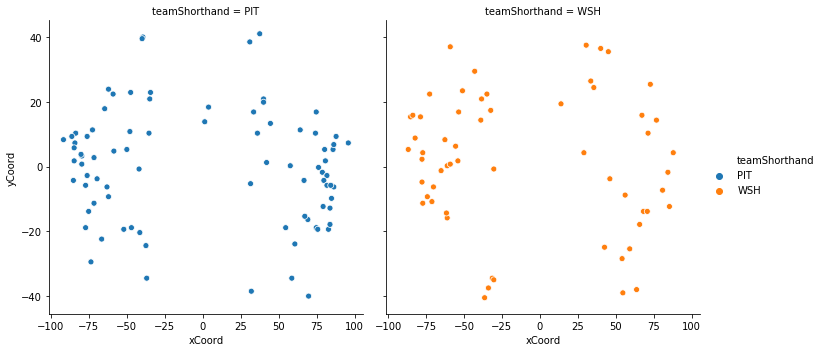

In [6]:
Ev_teams = pd.merge(events, teams, left_on=['teamId'], right_on = ['teamId'])

#Subsetting data to only consider shots
Ev_team_shot=Ev_teams[Ev_teams.name == 'shot']

#First Plot below would consider plotting the scatter plot using xcoord and ycoord (Colored By Team)
sns.relplot(x="xCoord", y="yCoord", hue="teamShorthand",
            col="teamShorthand", data=Ev_team_shot);


#Second Plot below would consider plotting the scatter plot using xcoord and ycoord (Colored By Team)
sns.relplot(x="xAdjCoord", y="yAdjCoord", hue="teamShorthand",
            col="teamShorthand", data=Ev_team_shot);

### Q4. Shot Plot Pt. 2

Create two new columns in your shot dataframe: `xPlotCoord` and `yPlotCoord`. In this new coordinate system, all of Washington's offensive zone shots should be have negative `xPlotCoord` and all of Pittsburgh's offensive zone shots should be in the positive `xPlotCoord`. Make sure you "flip" both the x and y coordinates! Using the newly generated coordinates, generate a scatter plot of Washington and Pittsburgh's shots coloured by team.

#### Analysis

How many shots were from outside the OZ for each team?

#### Answer

4 Shots were taken from the neutral zone shown in between the lines

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


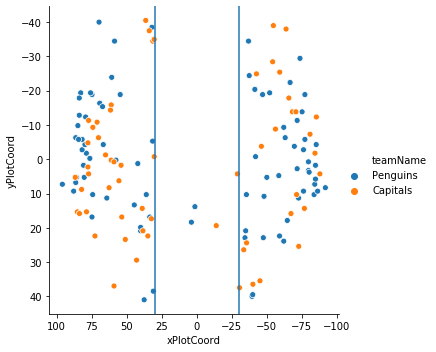

In [7]:
#Making new coordinates
Ev_team_shot['xPlotCoord']=np.where(Ev_team_shot['teamShorthand']=='WSH',(Ev_team_shot['xCoord'])*-1,Ev_team_shot['xCoord'])
Ev_team_shot['yPlotCoord']=Ev_team_shot['yCoord']

sns.relplot(x="xPlotCoord", y="yPlotCoord", hue="teamName",
             data=Ev_team_shot);
plt.axvline(x=30)
plt.axvline(x=-30)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

### Q5. Pass Reception Plots
Create a dataframe by merging the `events`, `rosters` and `teams` dataframes. Using the the `pass` and `reception` events, generate a scatterplot where x,y locations of the pass and reception are connected by a line. To do this, you'll need to find a way to merge the pass events to their corresponding reception events. Hint: Exclude passes with a failed outcome since they don't have corresponding receptions events


#### Analysis

Q 1 Which of the three coordinate systems (unadjusted, adjusted, plot) we've used would be best suited to this plot and why?


Answer: The best suited coordinate system would be the adjusted plot as there are relatively no passes in the space where the neutral zone leads up to the offensive zone in the adjusted plot. This is intuitive because no such passes
are made considering this area has a highest likelihood of an offside pass (Considering all dynamics relevant to an offside pass)

Q.2 Based on the locations of the pass and reception events. What are the areas of the ice that are least likely to be passed through, what areas are the most likely? Hint: Plotting with reduced line weights and transparency can help.

Answer: 'Offensive Zone Right Lane' is the most likely zone to be passes through and 'Defensive Zone Neutral Lane' is the least likely zone to be passes through
 

Q.3 Generate a seperate pass-reception plot for each team. What trends if any do you notice?

Answer: Team Penguins made more passes and receptions in the Offensive zone than Team Capitals
Team Capitals had more passes and receptions in the neurtral Zone than Team Penguins


Q.4 Generate a seperate pass-reception plot for forwards and defenders by team. What trends if any do you notice?

Answer: Forwards consisted of Right Wingers, Left Wingers and Center positions Forwards made more passes 
in the offensive zone than Defenders. Defenders more passes in defensive zone than Forwards

In [22]:
##### Data Wrangling to make the data set data viz ready!!!

#Merge events, rosters and teams
final=events.merge(rosters,on='teamId').merge(teams,on='teamId')

#Identifying next event or next action 
final['next_event']=final.name.shift(-1).fillna(method='ffill')

#next x and y coordinates using xcoord and ycoord
final['next_coord_x']=final.xCoord.shift(-1).fillna(method='ffill')
final['next_coord_y']=final.yCoord.shift(-1).fillna(method='ffill')

#next x and y adjusted coordinates using x adjusted coord and y adjusted coord
final['next_adj_coord_x']=final.xAdjCoord.shift(-1).fillna(method='ffill')
final['next_adj_coord_y']=final.yAdjCoord.shift(-1).fillna(method='ffill')

#x and y adjusted coordinates using x plot coord and y plot coord
final['xPlotCoord']=np.where(final['teamShorthand']=='WSH',(final['xCoord'])*-1,final['xCoord'])
final['yPlotCoord']=final['yCoord']

#next x and y adjusted coordinates using x plot coord and y plot coord
final['next_plot_coord_x']=final.xPlotCoord.shift(-1).fillna(method='ffill')
final['next_plot_coord_y']=final.yPlotCoord.shift(-1).fillna(method='ffill')


Pass_reception=final[(final['name']=='pass')&(final['next_event']=='reception')]




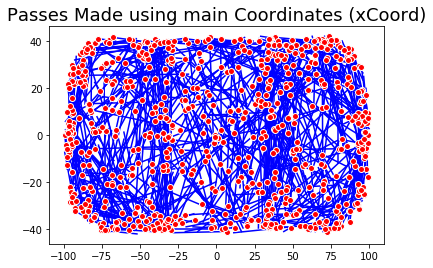

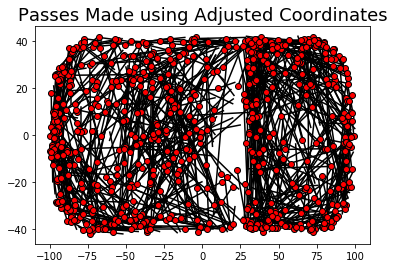

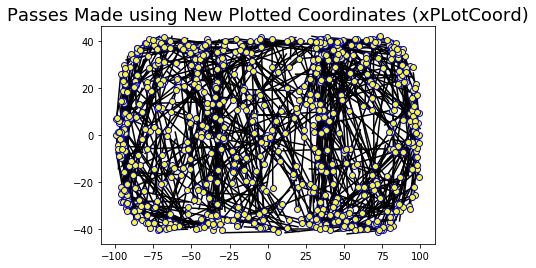

In [24]:
#### Analysis

## Q1. Which of the three coordinate systems (unadjusted, adjusted, plot) we've used would be best suited to this plot and why?


### Answer: The best suited coordinate system would be the adjusted plot as noticeably, the passes in the space where the 
## neutral zone leads up to the offensive zone is relatively empty just in this plot. This is intuitive because, fewer such passes
## are made considering from this area as it has a higher likelihood of a pass called offside.


### Using x coord and y coord
x = Pass_reception.xCoord.values
y = Pass_reception.yCoord.values
xe = Pass_reception.next_coord_x.values
ye = Pass_reception.next_coord_y.values
plt.scatter(x,y,color="red",edgecolors="white",zorder=12,alpha=1)
plt.title("Passes Made using main Coordinates (xCoord)",fontsize=18)
plt.plot([x,xe],[y,ye],alpha=1,color="blue")
plt.show()

### Using x adjustedcoord and y adjusted coord

x = Pass_reception.xAdjCoord.values
y = Pass_reception.yAdjCoord.values
xe = Pass_reception.next_adj_coord_x.values
ye = Pass_reception.next_adj_coord_y.values
plt.scatter(x,y,color="red",edgecolors="black",zorder=12,alpha=1)
plt.plot([x,xe],[y,ye],alpha=1,color="black")
plt.title("Passes Made using Adjusted Coordinates",fontsize=18)
plt.show()


### Using x plot coord and y plot coord

x = Pass_reception.xPlotCoord.values
y = Pass_reception.yPlotCoord.values
xe = Pass_reception.next_plot_coord_x.values
ye = Pass_reception.next_plot_coord_y.values
plt.scatter(x,y,color="yellow",edgecolors="blue",zorder=12,alpha=1)
plt.plot([x,xe],[y,ye],alpha=1,color="black")
plt.title("Passes Made using New Plotted Coordinates (xPLotCoord)",fontsize=18)
plt.show()

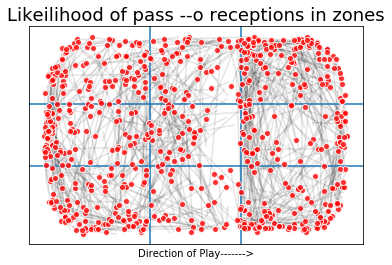

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                             zone_probability  % probability
zone                                                        
Defensive Zone Left Lane             0.002037       0.203722
Defensive Zone Neutral Lane          0.001132       0.113179
Defensive Zone Right Lane            0.001886       0.188632
Neutral Zone Left Lane               0.002238       0.223843
Neutral Zone Neutral Lane            0.001459       0.145875
Neutral Zone Right Lane              0.001886       0.188632
Offensive Zone Left Lane             0.002389       0.238934
Offensive Zone Neutral Lane          0.002088       0.208753
Offensive Zone Right Lane            0.002414       0.241449


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
####  Analysis

#### Q.2 Based on the locations of the pass and reception events. 
### What are the areas of the ice that are least likely to be passed through, 
### what areas are the most likely? Hint: Plotting with reduced line weights and transparency can help.

### Answer: 'Offensive Zone Right Lane' is the most likely zone to be passes through and 
#### 'Defensive Zone Neutral Lane' is the least likely zone to be passes through



x = Pass_reception.xAdjCoord.values
y = Pass_reception.yAdjCoord.values
xe = Pass_reception.next_adj_coord_x.values
ye = Pass_reception.next_adj_coord_y.values
plt.scatter(x,y,color="red",edgecolors="white",zorder=5,alpha=0.8)
plt.plot([x,xe],[y,ye],alpha=0.1,color="black")
plt.title("Likeilihood of pass --o receptions in zones",fontsize=18)
plt.axvline(x=30)
plt.axvline(x=-30)
plt.axhline(y=-13)
plt.axhline(y=13)
plt.xlabel('Direction of Play------->')
plt.xticks([])
plt.yticks([])
#plt.grid(False)
plt.show()

#Likelihoods of zone receptions
#Splitting the x coordinate zones into thirds
bins = [-90,-30,30, 90]
labels = ['Defensive Zone','Neutral Zone', 'Offensive Zone']
Pass_reception['x_zone'] = pd.cut(Pass_reception['next_adj_coord_x'], bins=bins, labels=labels).fillna(method='ffill')

#Splitting the y coordinate zones into thirds
bins1 = [-40,-13,13, 41]
labels1 = ['Right Lane','Neutral Lane', 'Left Lane']
Pass_reception['y_zone'] = pd.cut(Pass_reception['next_adj_coord_y'], bins=bins1, labels=labels1).fillna(method='ffill')

#Combining both the horizontal and vertical zones to form : 6 Zones
Pass_reception['zone'] = Pass_reception[['x_zone', 'y_zone']].apply(lambda x: ' '.join(x), axis=1)

#Probabability 
Pass_reception['zone_probability'] = list(Pass_reception.groupby('zone')['zone'].transform(lambda x : x.count()/len(final)))
Probabibility=Pass_reception[['zone_probability','zone']]
Probabibility=Probabibility.groupby(['zone']).mean()
Probabibility['% probability']=Probabibility.zone_probability*100
print(Probabibility)

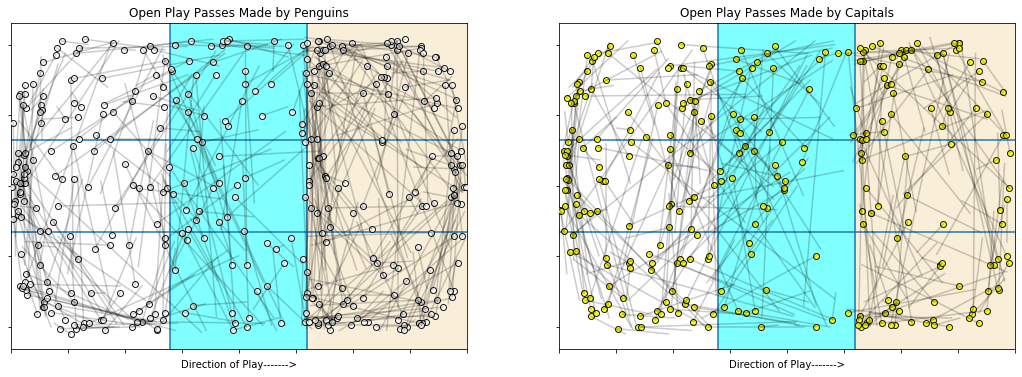

In [19]:
#### Analysis

## Generate a seperate pass-reception plot for each team. What trends if any do you notice?

## Team Penguins made more passes and receptions in the Offensive zone than Team Capitals
## Team Capitals had more passes and receptions in the neurtral Zone than Team Penguins


### Using x coord and y coord

team=list(Pass_reception.teamName.unique())

PIT=Pass_reception[Pass_reception['teamShorthand']=='PIT']
WSH=Pass_reception[Pass_reception['teamShorthand']=='WSH']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
x = PIT.xAdjCoord.values
y = PIT.yAdjCoord.values
xe = PIT.next_adj_coord_x.values
ye = PIT.next_adj_coord_y.values
x1 = WSH.xAdjCoord.values
y1 = WSH.yAdjCoord.values
xe1 = WSH.next_adj_coord_x.values
ye1 = WSH.next_adj_coord_y.values
ax1.scatter(x,y,color="white",edgecolors="black",zorder=5,alpha=0.9)
ax1.plot([x,xe],[y,ye],zorder=20,alpha=0.2,color="black")
ax2.scatter(x1,y1,color="yellow",edgecolors="black",zorder=5,alpha=0.9)
ax2.plot([x1,xe1],[y1,ye1],zorder=20,alpha=0.2,color="black")
ax1.title.set_text("Open Play Passes Made by " + str(team[0]))
ax2.title.set_text("Open Play Passes Made by " + str(team[1]))
ax1.grid(False)
ax2.grid(False)
ax1.axvline(x=-30)
ax1.axvline(x=30)
ax1.axvspan(-30, 30, alpha=0.5, color='cyan')
ax1.axvspan(30, 100, alpha=0.5, color='wheat')
ax2.axvspan(-30, 30, alpha=0.5, color='cyan')
ax2.axvspan(30, 100, alpha=0.5, color='wheat')
ax1.set_xlim(-100,100)
ax2.set_xlim(-100,100)
ax2.axvline(x=-30)
ax2.axvline(x=30)
ax1.axhline(y=-13)
ax1.axhline(y=13)
ax2.axhline(y=-13)
ax2.axhline(y=13)
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])
ax1.set_xlabel('Direction of Play------->')
ax2.set_xlabel('Direction of Play------->')
plt.show()

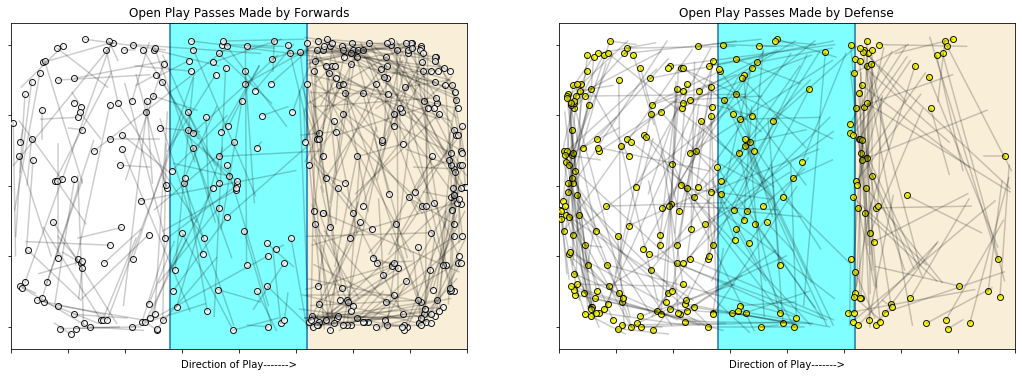

In [20]:
#### Analysis

## Generate a seperate pass-reception plot for forwards and defenders by team. What trends if any do you notice?

## Answer: Forwards consisted of Right Wingers, Left Wingers and Center positions Forwards made more passes 
# in the offensive zone than Defenders
# Defenders more passes in their defensive zone than Forwards

Forwards=['C','LW','RW']
### Using x coord and y coord
Forward=Pass_reception[Pass_reception['playerPosition'].isin(Forwards)]
Defense=Pass_reception[Pass_reception['playerPosition']=='D']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
x = Forward.xAdjCoord.values
y = Forward.yAdjCoord.values
xe = Forward.next_adj_coord_x.values
ye = Forward.next_adj_coord_y.values
x1 = Defense.xAdjCoord.values
y1 = Defense.yAdjCoord.values
xe1 = Defense.next_adj_coord_x.values
ye1 = Defense.next_adj_coord_y.values
ax1.scatter(x,y,color="white",edgecolors="black",zorder=5,alpha=0.9)
ax1.plot([x,xe],[y,ye],zorder=20,alpha=0.2,color="black")
ax2.scatter(x1,y1,color="yellow",edgecolors="black",zorder=5,alpha=0.9)
ax2.plot([x1,xe1],[y1,ye1],zorder=20,alpha=0.2,color="black")
ax1.title.set_text("Open Play Passes Made by Forwards")
ax2.title.set_text("Open Play Passes Made by Defense")
ax1.grid(False)
ax2.grid(False)
ax1.axvline(x=-30)
ax1.axvline(x=30)
ax1.axvspan(-30, 30, alpha=0.5, color='cyan')
ax1.axvspan(30, 100, alpha=0.5, color='wheat')
ax2.axvspan(-30, 30, alpha=0.5, color='cyan')
ax2.axvspan(30, 100, alpha=0.5, color='wheat')
ax1.set_xlim(-100,100)
ax2.set_xlim(-100,100)
ax2.axvline(x=-30)
ax2.axvline(x=30)
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])
ax1.set_xlabel('Direction of Play------->')
ax2.set_xlabel('Direction of Play------->')
plt.show()

### Q6. Corsi!
Using the `playersOnIce` column in the `events` dataframe, create two new columns `teamPlayersOnIds` and `opponentPlayersOnIds`. Use the players on ice data to make a a new dataframe calculating each player's while on ice Corsi ratio. The Corsi ratio is is the ratio of shot attempts for divided by the total shot attempts while the player was on the ice. Make sure you join the playerids to the `rosters` table to get player names.

Hint: The `playersOnIce` column contains a dictionary with the keys being the `teamid` of the two respective teams and the values being a list of `playerids` of players on ice at the time of the event.

#### Analysis

Which player had the best or worst Corsi ratio on each team?
    
#### Answer

The Player with the Highest Corsi Ratio for Pittsburgh Penguins is Dominik Simon( 0.7727272727272727).

The Player with the Lowest Corsi Ratio for Pittsburgh Penguins is Matt Cullen( 0.391304347826087).

The Player with the Highest Corsi Ratio for Washington Capitals is Nicklas Backstrom( 0.5555555555555556).

The Player with the Lowest Corsi Ratio for Washington Capitals is Chandler Stephenson( 0.08333333333333333).

In [18]:
events = pd.read_csv(r'C:\Users\Home\Downloads\sliq_analyst_problem_set (1)\gameevents.csv')
rosters = pd.read_csv(r'C:\Users\Home\Downloads\sliq_analyst_problem_set (1)\gamerosters.csv')



#Applying a function to split the column stored as a dictionary and then use the concat function to bring back the columns into
#the dataframe
events.playersOnIce= events.playersOnIce.apply(lambda x : dict(eval(x)))
df2 = events.playersOnIce.apply(pd.Series)
events1=pd.concat([events.drop(['playersOnIce'], axis=1), df2], axis=1)

#Creating two Columns that have a list of players in each row
events1['teamPlayersOnIds']=np.where(events1['teamId']==31,events1['31'],events1['30'])
events1['opponentPlayersOnIds']=np.where(events1['teamId']==30,events1['31'],events1['30'])

#Merge with Rosters data to get players names an team names
Merged = pd.merge(rosters, events1, left_on=['playerId'], right_on = ['playerId'])

#Subsetting data to only consider shots
Merged_shot=Merged[Merged.name == 'shot']
                  
#Breaking the lists in each row into unique row values for every player on ice
teamPlayersOnIds=Merged_shot.explode('teamPlayersOnIds')
opponentPlayersOnIds=Merged_shot.explode('opponentPlayersOnIds')
                  
#shots counts by player
shots_attempts_for=(teamPlayersOnIds['teamPlayersOnIds'].value_counts())
shots_attempts_against=(opponentPlayersOnIds['opponentPlayersOnIds'].value_counts())
Total_Shots=shots_attempts_against+shots_attempts_for

#Calculating The Corsi Ratio and converting the Player ID stored as the index to column (changing string to int for later mapping)
Corsi_Ratio=shots_attempts_for/Total_Shots
Corsi_Ratio=pd.DataFrame(Corsi_Ratio)
Corsi_Ratio['playerId'] = Corsi_Ratio.index
Corsi_Ratio.columns = ["Corsi_Ratio", "playerId"]
Corsi_Ratio['playerId']=Corsi_Ratio['playerId'].astype(int)
Corsi_Ratio=Corsi_Ratio.reset_index(drop=True)                 

#Merging the First and Last Name of Players to create Player Names and Merge!!
rosters['Player_name'] = rosters[['firstName', 'lastName']].apply(lambda x: ' '.join(x), axis=1)
rosters['team_name']=np.where(rosters['teamId']==30,'Pittsburgh Penguins','Washington Capitals')
Corsi_Ratio1 = pd.merge(Corsi_Ratio, rosters[['playerId','Player_name','teamId','team_name']], on = ['playerId'])

#Maximum and Minimum Corsi Ratio Values:Washington Capitals
Washington_Capitals=Corsi_Ratio1[Corsi_Ratio1.team_name == 'Washington Capitals']
Washington_Capitals=Washington_Capitals.sort_values(['Corsi_Ratio'], ascending=[False]).reset_index(drop=True)
Max_Min_WC=pd.concat([Washington_Capitals.head(1), Washington_Capitals.tail(1)])
                  
#Maximum and Minimum Corsi Ratio Values:Washington Capitals
Pittsburgh_Penguins=Corsi_Ratio1[Corsi_Ratio1.team_name == 'Pittsburgh Penguins']
Pittsburgh_Penguins=Pittsburgh_Penguins.sort_values(['Corsi_Ratio'], ascending=[False]).reset_index(drop=True)
Max_Min_PP=pd.concat([Pittsburgh_Penguins.head(1), Pittsburgh_Penguins.tail(1)])


print('The Player with the Highest Corsi Ratio for '+ str(Max_Min_PP.team_name[0])+' is '+ str(Max_Min_PP.Player_name[0]+ '( '+str(Max_Min_PP.Corsi_Ratio[0])+')' ))
print('The Player with the Lowest Corsi Ratio for '+ str(Max_Min_PP.team_name[18])+' is '+ str(Max_Min_PP.Player_name[18]+ '( '+str(Max_Min_PP.Corsi_Ratio[18])+')' ))
print('The Player with the Highest Corsi Ratio for '+ str(Max_Min_WC.team_name[0])+' is '+ str(Max_Min_WC.Player_name[0]+ '( '+str(Max_Min_WC.Corsi_Ratio[0])+')' ))
print('The Player with the Lowest Corsi Ratio for '+ str(Max_Min_WC.team_name[18])+' is '+ str(Max_Min_WC.Player_name[18]+ '( '+str(Max_Min_WC.Corsi_Ratio[18])+')' ))


The Player with the Highest Corsi Ratio for Pittsburgh Penguins is Dominik Simon( 0.7727272727272727)
The Player with the Lowest Corsi Ratio for Pittsburgh Penguins is Matt Cullen( 0.391304347826087)
The Player with the Highest Corsi Ratio for Washington Capitals is Nicklas Backstrom( 0.5555555555555556)
The Player with the Lowest Corsi Ratio for Washington Capitals is Chandler Stephenson( 0.08333333333333333)
